In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
from input_parser import InputParser
from abstract_simulator import AbstractMachineSimulator
from abstract_grapher import graph_abstract_machine

In [194]:
parser = InputParser("""

// This is a comment.

// Data section
.DATA

STACK q0
QUEUE q1
TAPE T2

// Logic section
.LOGIC

// State Transitions
q0] SCAN (0,q0), (1,q1), (1,accept)
q1] SCAN (0,q0), (1,q2)
q2] SCAN (0,q0), (1,q1), (1,accept)

""")

In [297]:
parser = InputParser("""
.DATA
STACK S1
.LOGIC
A] WRITE(S1) (#,B)
B] SCAN RIGHT (a,C), (b,D)
C] WRITE(S1) (X,B)
D] READ(S1) (X,E)
E] SCAN RIGHT (b,D), (c,F), (#,F)
F] READ(S1) (#,G)
G] WRITE(S1) (#,H)
H] SCAN LEFT (b,H), (a,I)
I] SCAN RIGHT (a,I), (b,J)
J] WRITE(S1) (X,K)
K] SCAN RIGHT (b,J), (c,L)
L] READ(S1) (X,M)
M] SCAN RIGHT (c,L), (#,N)
N] READ(S1) (#,accept)
""")

In [188]:
parser = InputParser("""
.DATA
TAPE T1
.LOGIC
A] RIGHT(T1) (0/X,B), (Y/Y,D), (1/1,reject)
B] RIGHT(T1) (0/0,B), (Y/Y,B), (1/Y,C)
C] LEFT(T1) (0/0,C), (Y/Y,C), (X/X,A)
D] RIGHT(T1) (Y/Y,D), (#/#,accept), (1/1,reject)
""")

In [209]:
parser = InputParser("""
.LOGIC
q0] SCAN (0,q0), (1,q1), (1,accept)
q1] SCAN (0,q0), (1,q2)
q2] SCAN (0,q0), (1,q1), (1,accept)
""")

In [224]:
parser = InputParser("""
.LOGIC
A] SCAN RIGHT (0,A), (1,B), (#,accept)
B] SCAN LEFT (0,C), (1,reject)
C] SCAN RIGHT (1,A)
""")

In [240]:
parser = InputParser("""
.DATA
STACK S1
.LOGIC
A] WRITE(S1) (#,B)
B] SCAN (0,C), (1,D)
C] WRITE(S1) (#,B)
D] READ(S1) (#,E)
E] SCAN (1,D), (#,F)
F] READ(S1) (#,accept)
""")

In [316]:
parser = InputParser("""
.DATA
TAPE T1
.LOGIC
A] RIGHT(T1) (0/X,B), (Y/Y,D), (1/1,reject)
B] RIGHT(T1) (0/0,B), (Y/Y,B), (1/Y,C)
C] LEFT(T1) (0/0,C), (Y/Y,C), (X/X,A)
D] RIGHT(T1) (Y/Y,D), (#/#,accept), (1/1,reject)
""")

In [317]:
parsed = parser.parse()
parsed

{'aux_data': {'T1': {'type': 'TAPE'}},
 'logic': {'A': {'instruction': 'RIGHT(T1)',
   'arguments': ['(0/X,B)', '(Y/Y,D)', '(1/1,reject)']},
  'B': {'instruction': 'RIGHT(T1)',
   'arguments': ['(0/0,B)', '(Y/Y,B)', '(1/Y,C)']},
  'C': {'instruction': 'LEFT(T1)',
   'arguments': ['(0/0,C)', '(Y/Y,C)', '(X/X,A)']},
  'D': {'instruction': 'RIGHT(T1)',
   'arguments': ['(Y/Y,D)', '(#/#,accept)', '(1/1,reject)']}}}

In [351]:
simulator = AbstractMachineSimulator(parsed)
simulator.state_map

{'A': {'instruction': 'RIGHT',
  'associated_data': 'T1',
  'transitions': {'0/X': 'B', 'Y/Y': 'D', '1/1': 'reject'}},
 'B': {'instruction': 'RIGHT',
  'associated_data': 'T1',
  'transitions': {'0/0': 'B', 'Y/Y': 'B', '1/Y': 'C'}},
 'C': {'instruction': 'LEFT',
  'associated_data': 'T1',
  'transitions': {'0/0': 'C', 'Y/Y': 'C', 'X/X': 'A'}},
 'D': {'instruction': 'RIGHT',
  'associated_data': 'T1',
  'transitions': {'Y/Y': 'D', '#/#': 'accept', '1/1': 'reject'}}}

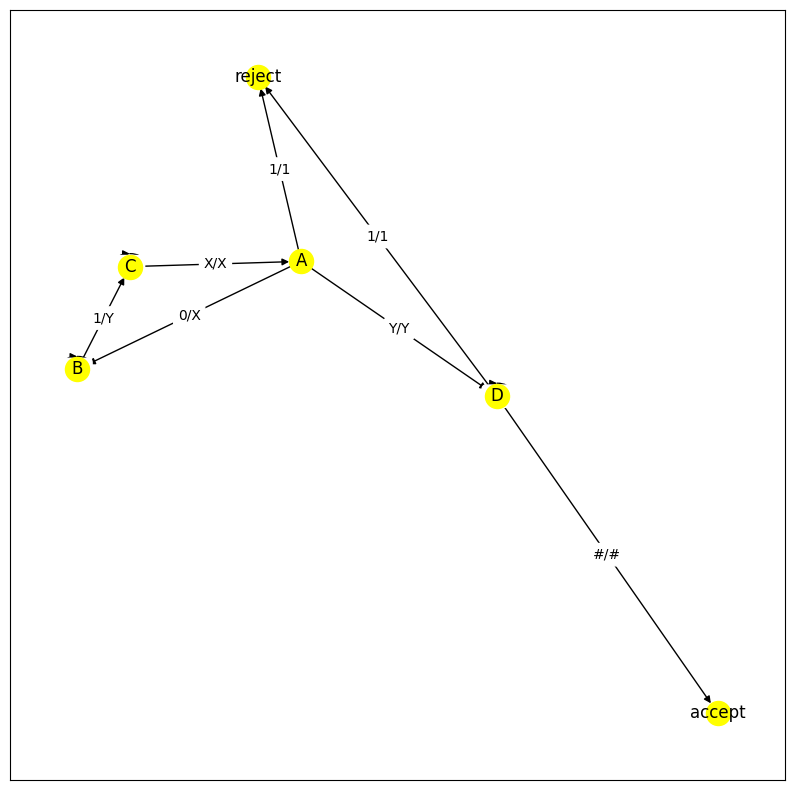

In [319]:
graph_abstract_machine(parsed['logic'])

In [348]:
input_tape = "#1#"
simulator.set_input_tape(input_tape, is_turing_machine=True)
# simulator.input_tape.__str__()
simulator.memory["T1"].__str__()


'[#]1#'

In [350]:
simulator.run(verbose=True)
simulator.halted, simulator.accepted

(True, False)

In [308]:
simulator.step(verbose=True)
print(simulator.memory["S1"])
str(simulator.input_tape)

Starting at state A
Wrote symbol # to S1
Transitioned to state B
['#']


'[#]aaabbbccc#'

In [315]:
simulator.halted, simulator.accepted

(True, False)